In [1]:
import splitfolders
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import optimizers
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
classes = ['Bicycle', 'Car']

In [3]:
!rm -r splited
splitfolders.ratio(f'data', output="splited", seed=1337, ratio=(0.8, 0.1, 0.1))

validation_dir = 'splited/val'
test_dir = 'splited/test'
train_dir = 'splited/train'

Copying files: 1415 files [00:00, 1872.55 files/s]


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-03-24 17:42:48.549490: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-24 17:42:48.549614: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    shuffle=False,
    class_mode='binary')

Found 1131 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20


2022-03-24 17:42:48.887934: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-24 17:42:49.122249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5126

2022-03-24 17:43:03.584224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 16s 310ms/step - loss: 0.6932 - accuracy: 0.5126 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/20
50/50 [==============================] - 14s 282ms/step - loss: 0.6912 - accuracy: 0.5308
Epoch 3/20
50/50 [==============================] - 14s 271ms/step - loss: 0.6892 - accuracy: 0.6226
Epoch 4/20
50/50 [==============================] - 14s 275ms/step - loss: 0.6866 - accuracy: 0.6377
Epoch 5/20
50/50 [==============================] - 14s 271ms/step - loss: 0.6846 - accuracy: 0.6226
Epoch 6/20
50/50 [==============================] - 14s 274ms/step - loss: 0.6807 - accuracy: 0.6609
Epoch 7/20
50/50 [==============================] - 14s 273ms/step - loss: 0.6755 - accuracy: 0.6731
Epoch 8/20
50/50 [==============================] - 14s 278ms/step - loss: 0.6687 - accuracy: 0.6599
Epoch 9/20
50/50 [==============================] - 14s 272ms/step - loss: 0.6571 - accuracy: 0.6902
Epoch 10/20
50/50 [==============================] - 14s 275

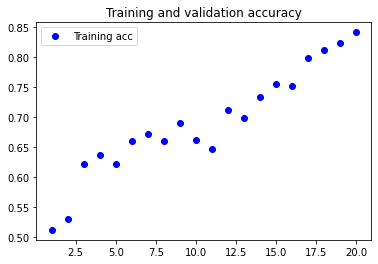

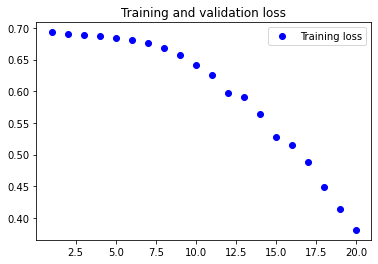

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_generator)

5/5 [==============================] - 1s 247ms/step - loss: 0.3205 - accuracy: 0.8750


In [10]:
test_acc

0.875

In [11]:
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator)

2022-03-24 17:47:30.137987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [12]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
matrix = confusion_matrix(y_true, [0 if i < 0.5 else 1 for i in y_pred])
matrix

array([[68,  4],
       [14, 58]])

In [14]:
res = classification_report(y_true, [0 if i < 0.5 else 1 for i in y_pred])
print(res)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        72
           1       0.94      0.81      0.87        72

    accuracy                           0.88       144
   macro avg       0.88      0.88      0.87       144
weighted avg       0.88      0.88      0.87       144

